# Инициализация

In [16]:
import numpy as np
from matplotlib import pylab as plt

import optimizers
from importlib import reload

In [17]:
reload(optimizers)
d = 100
mu = 1
L = 1000
sigma = 0

matrix = optimizers.generate_matrix(d, mu, L)
vector = np.random.random_sample(d)

In [18]:
def quadratic(x):
    xi = sigma * np.random.standard_normal(1)
    return 1./2 * x.T @ matrix @ x - vector.T @ x + xi

def gradient_true(x, x1, x2, x3, x4, x5):
    return matrix @ x - vector, 1, _, _

In [19]:
def const_step(k):
    if k > 100000:
        return 10 / (4 * d * L * (k // 1000))
    elif k > 10000:
        return 10 / (4 * d * L * (k // 10000))
    else:
        return 10 / (4 * d * L)
    

def fw_step(k):
    return 2 / (k + 2)

def momentum_fw(k):
    return (k + 1) / (k + 3)

def momentum_k(k):
    return k / (k + 1)

# Эксперименты FW с разной оценкой градиента на квадратичной задаче

## TPF

### l1-ball

In [263]:
reload(optimizers)

w_0 = np.random.random_sample(d)

### l_1 ball ###
w_0_l1 = w_0 / np.linalg.norm(w_0, ord=1)

_, _, w_sol_l1 = optimizers.GDOptimizer(
    w_0_l1, 
    gradient_true, 
    const_step, 
    quadratic,
    eps = -1000,
    use_proj = True,
    set_name = 'l1_ball', 
    x_sol = w_0_l1,
    max_oracle_calls = 10000, 
    criterion = 'nabla(f)(x_k)'
).search()

R_0_l1 = quadratic(w_0_l1) - quadratic(w_sol_l1)

100%|███████████████████████████████████| 10000/10000 [00:01<00:00, 6930.82it/s]


In [264]:
reload(optimizers)

get_grads = [
    optimizers.get_grad_tpf_jaguar,
    optimizers.get_grad_tpf,
    optimizers.get_grad_tpf_full
]
# step_funcs = [
#     const_step,
#     const_step,
#     const_step
# ]
step_funcs = [
    fw_step,
    fw_step,
    fw_step
]
use_jaguars = [
    True,
    False, 
    False
]

errors = []
oracle_calls = []

for get_grad, step_func, use_jaguar in zip(get_grads, step_funcs, use_jaguars):
    errors_, oracle_calls_, _ = optimizers.FWOptimizer(
        w_0_l1, 
        get_grad, 
        step_func, 
        quadratic,
        eps=-1000,
        set_name='l1_ball',
        use_jaguar = use_jaguar,
        x_sol = w_sol_l1,
        max_oracle_calls = 100000
    ).search()
    errors.append(errors_ / R_0_l1)
    oracle_calls.append(oracle_calls_)
    


  0%|▏                                    | 500/100000 [00:03<10:40, 155.45it/s]


In [148]:
w_sol_l1

array([ 0.13809283, -0.00154674,  0.00542602, -0.14215002,  0.12422923,
        0.13803584,  0.10947152, -0.14679759,  0.18322588,  0.01102433])

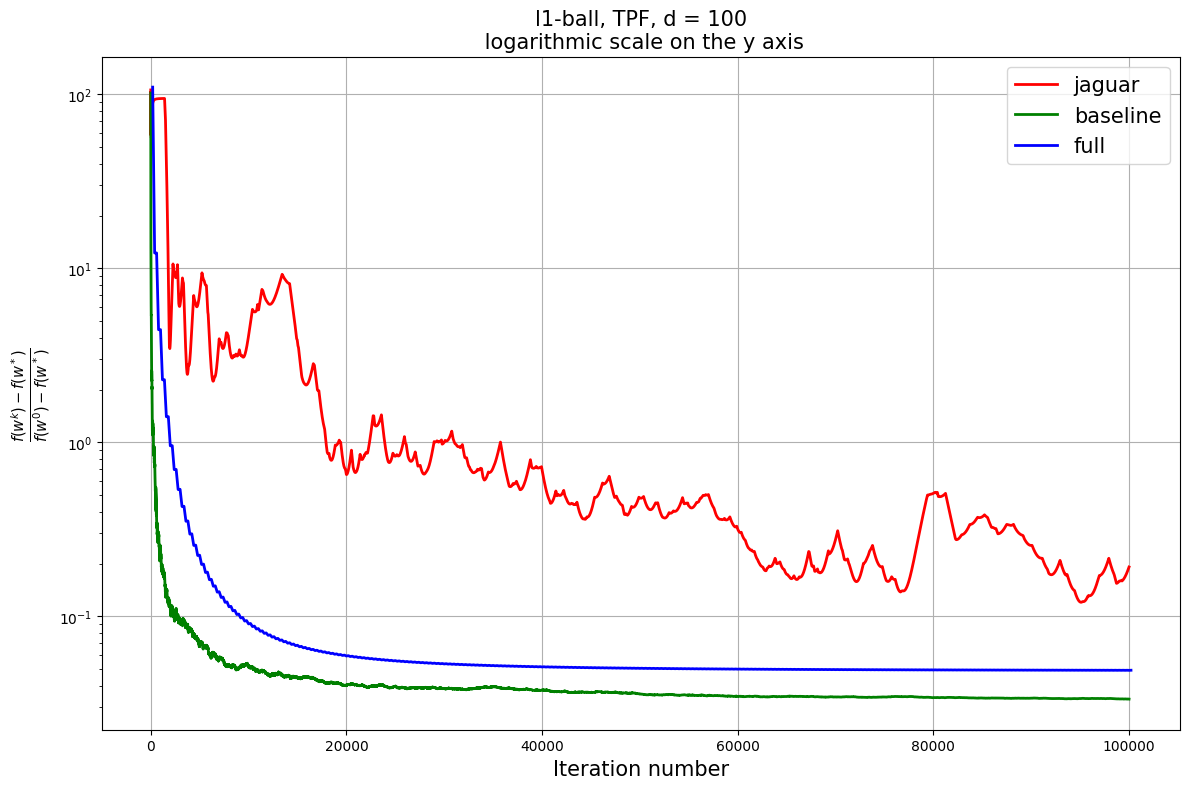

In [265]:
title = f"l1-ball, TPF, d = {d}"
y_label = r'$\frac{f(w^k) - f(w^*)}{f(w^0) - f(w^*)}$'
labels = [
    'jaguar',
    'baseline',
    'full'
]
iterations = range(1, len(errors) + 1)

optimizers.make_err_plot(oracle_calls, errors, y_label=y_label, labels=labels, title=title)

### l2-ball

In [190]:
reload(optimizers)

w_0 = np.random.random_sample(d)

### l_2 ball ###
w_0_l2 = w_0 / np.linalg.norm(w_0, ord=2)

_, _, w_sol_l2 = optimizers.GDOptimizer(
    w_0_l2, 
    gradient_true, 
    const_step, 
    quadratic,
    eps = -1000,
    use_proj = True,
    set_name = 'l2_ball', 
    x_sol = w_0_l2,
    max_oracle_calls = 1000000, 
    criterion = 'nabla(f)(x_k)'
).search()

R_0_l2 = quadratic(w_0_l2) - quadratic(w_sol_l2)

100%|██████████████████████████████| 1000000/1000000 [00:40<00:00, 24599.85it/s]


In [191]:
reload(optimizers)

get_grads = [
    optimizers.get_grad_tpf_jaguar,
    optimizers.get_grad_tpf,
    optimizers.get_grad_tpf_full
]
step_funcs = [
    fw_step,
    fw_step,
    fw_step
]
use_jaguars = [
    True,
    False, 
    False
]

errors = []
oracle_calls = []

for get_grad, step_func, use_jaguar in zip(get_grads, step_funcs, use_jaguars):
    errors_, oracle_calls_, _ = optimizers.FWOptimizer(
        w_0_l2, 
        get_grad, 
        step_func, 
        quadratic,
        eps=-1000,
        set_name='l2_ball',
        use_jaguar = use_jaguar,
        x_sol = w_sol_l2,
        max_oracle_calls = 100000
    ).search()
    errors.append(errors_ / R_0_l2)
    oracle_calls.append(oracle_calls_)
    


  5%|█▊                                 | 5000/100000 [00:02<00:53, 1772.46it/s]


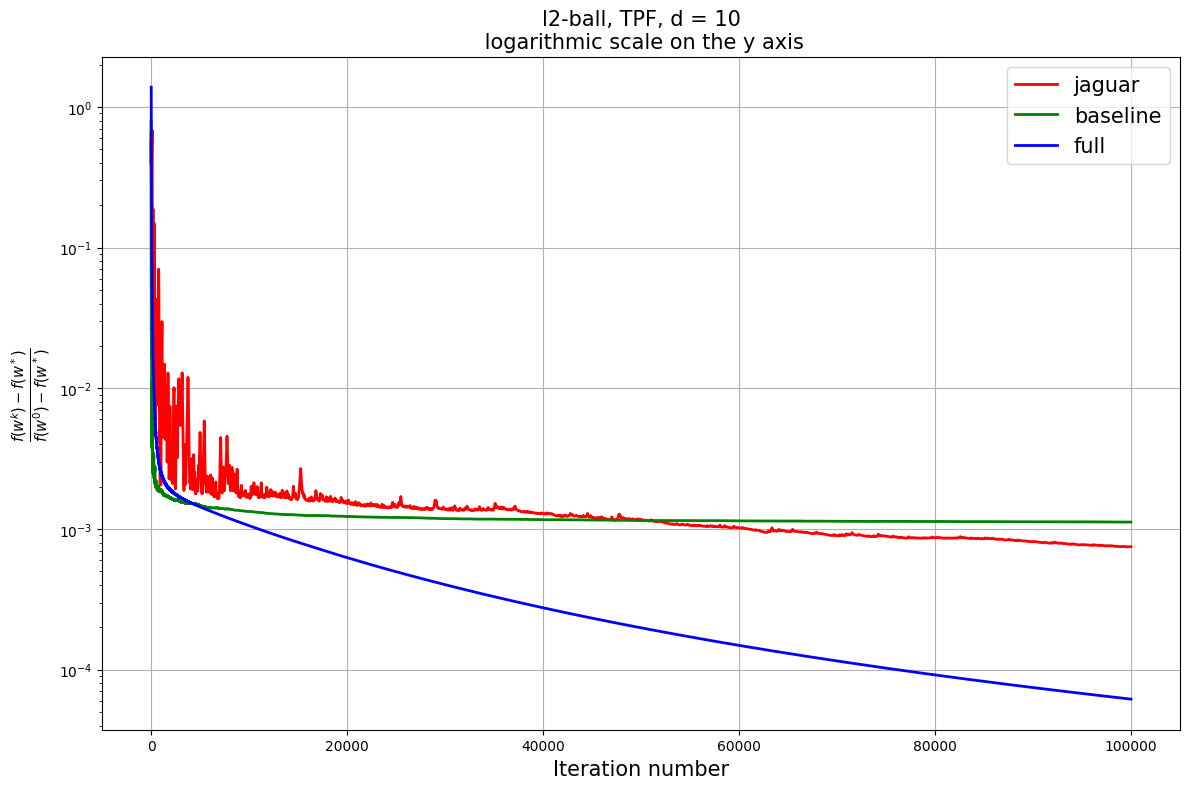

In [192]:
title = f"l2-ball, TPF, d = {d}"
y_label = r'$\frac{f(w^k) - f(w^*)}{f(w^0) - f(w^*)}$'
labels = [
    'jaguar',
    'baseline',
    'full'
]
iterations = range(1, len(errors) + 1)

optimizers.make_err_plot(oracle_calls, errors, y_label=y_label, labels=labels, title=title)

### simplex

In [187]:
reload(optimizers)

w_0 = np.random.random_sample(d)

### simplex ###
w_0_s = np.abs(w_0) / np.linalg.norm(w_0, ord=1)

_, _, w_sol_s = optimizers.GDOptimizer(
    w_0_s, 
    gradient_true, 
    const_step, 
    quadratic,
    eps = -1000,
    use_proj = True,
    set_name = 'simplex', 
    x_sol = w_0_s,
    max_oracle_calls = 1000000, 
    criterion = 'nabla(f)(x_k)'
).search()

R_0_s = quadratic(w_0_s) - quadratic(w_sol_s)

100%|██████████████████████████████| 1000000/1000000 [00:51<00:00, 19595.94it/s]


In [188]:
reload(optimizers)

get_grads = [
    optimizers.get_grad_tpf_jaguar,
    optimizers.get_grad_tpf,
    optimizers.get_grad_tpf_full
]
step_funcs = [
    fw_step,
    fw_step,
    fw_step
]
use_jaguars = [
    True,
    False, 
    False
]

errors = []
oracle_calls = []

for get_grad, step_func, use_jaguar in zip(get_grads, step_funcs, use_jaguars):
    errors_, oracle_calls_, _ = optimizers.FWOptimizer(
        w_0_s, 
        get_grad, 
        step_func, 
        quadratic,
        eps=-1000,
        set_name='simplex',
        use_jaguar = use_jaguar,
        x_sol = w_sol_s,
        max_oracle_calls = 100000
    ).search()
    errors.append(errors_ / R_0_s)
    oracle_calls.append(oracle_calls_)
    


  5%|█▊                                 | 5000/100000 [00:02<00:54, 1742.77it/s]


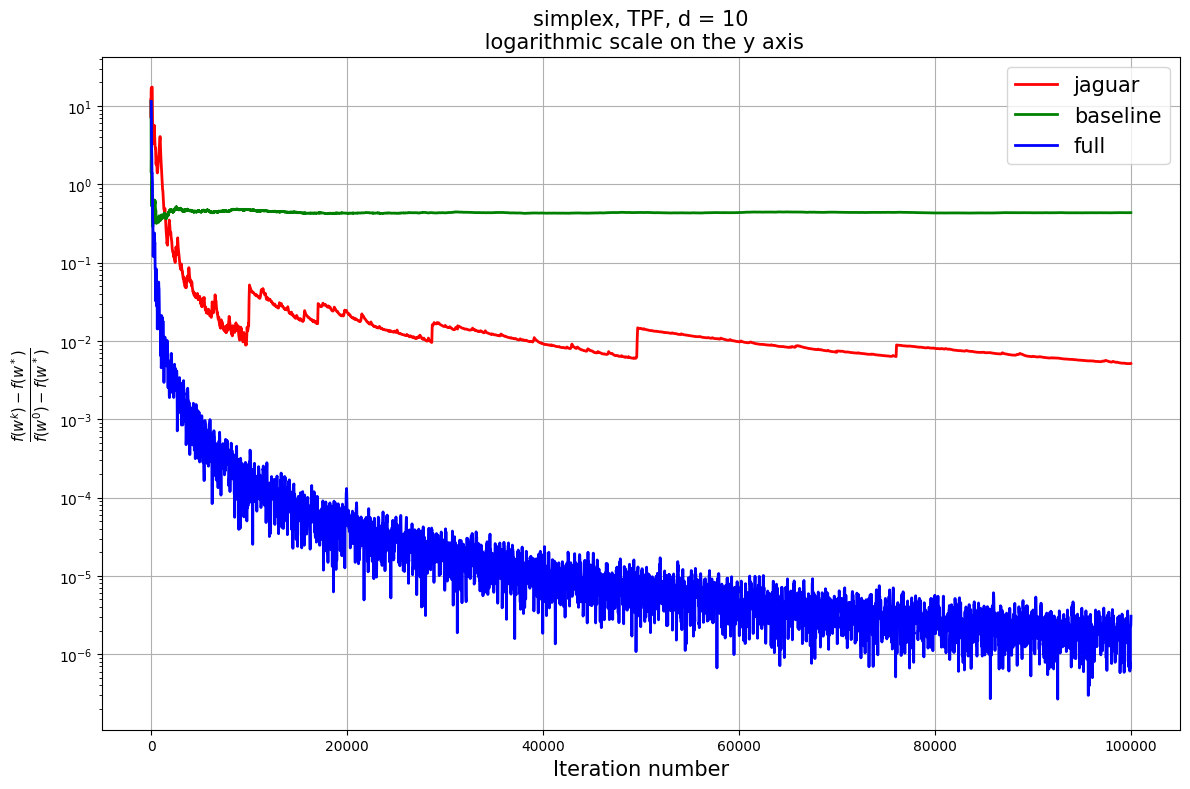

In [189]:
title = f"simplex, TPF, d = {d}"
y_label = r'$\frac{f(w^k) - f(w^*)}{f(w^0) - f(w^*)}$'
labels = [
    'jaguar',
    'baseline',
    'full'
]
iterations = range(1, len(errors) + 1)

optimizers.make_err_plot(oracle_calls, errors, y_label=y_label, labels=labels, title=title)

## OPF

### l1-ball

In [193]:
reload(optimizers)

w_0 = np.random.random_sample(d)

### l_1 ball ###
w_0_l1 = w_0 / np.linalg.norm(w_0, ord=1)

_, _, w_sol_l1 = optimizers.GDOptimizer(
    w_0_l1, 
    gradient_true, 
    const_step, 
    quadratic,
    eps = -1000,
    use_proj = True,
    set_name = 'l1_ball', 
    x_sol = w_0_l1,
    max_oracle_calls = 100000, 
    criterion = 'nabla(f)(x_k)'
).search()

R_0_l1 = quadratic(w_0_l1) - quadratic(w_sol_l1)

100%|█████████████████████████████████| 100000/100000 [00:10<00:00, 9113.64it/s]


In [194]:
reload(optimizers)

get_grads = [
    optimizers.get_grad_opf_jaguar,
    optimizers.get_grad_opf
]
step_funcs = [
    fw_step,
    fw_step
]
use_jaguars = [
    True,
    False
]

errors = []
oracle_calls = []

for get_grad, step_func, use_jaguar in zip(get_grads, step_funcs, use_jaguars):
    errors_, oracle_calls_, _ = optimizers.FWOptimizer(
        w_0_l1, 
        get_grad, 
        step_func, 
        quadratic,
        eps=-1000,
        set_name='l1_ball',
        use_jaguar = use_jaguar,
        x_sol = w_true_sol_l1,
        max_oracle_calls = 100000
    ).search()
    errors.append(errors_ / R_0_l1)
    oracle_calls.append(oracle_calls_)
    


100%|█████████████████████████████████| 100000/100000 [00:11<00:00, 8395.76it/s]


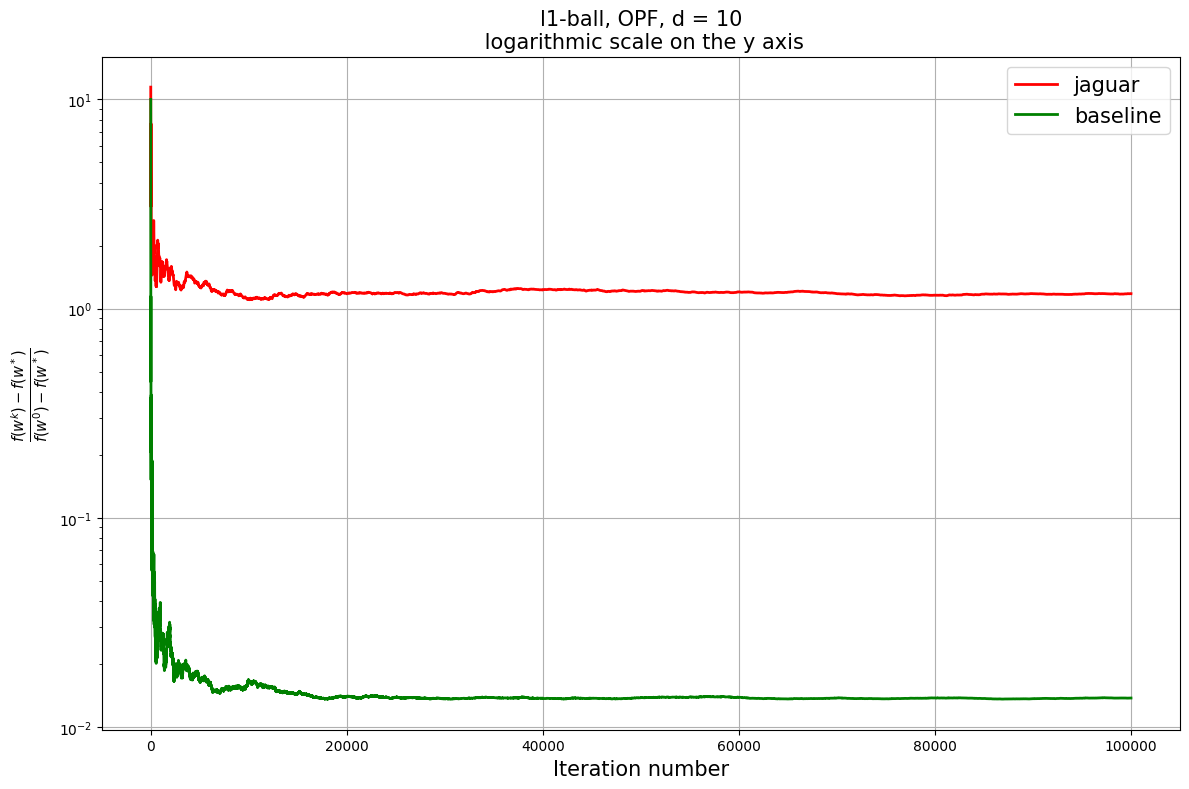

In [195]:
title = f"l1-ball, OPF, d = {d}"
y_label = r'$\frac{f(w^k) - f(w^*)}{f(w^0) - f(w^*)}$'
labels = [
    'jaguar',
    'baseline',
    'full'
]
iterations = range(1, len(errors) + 1)

optimizers.make_err_plot(oracle_calls, errors, y_label=y_label, labels=labels, title=title)

### l2-ball

In [197]:
reload(optimizers)

w_0 = np.random.random_sample(d)

### l_2 ball ###
w_0_l2 = w_0 / np.linalg.norm(w_0, ord=2)

_, _, w_sol_l2 = optimizers.GDOptimizer(
    w_0_l2, 
    gradient_true, 
    const_step, 
    quadratic,
    eps = -1000,
    use_proj = True,
    set_name = 'l2_ball', 
    x_sol = w_0_l2,
    max_oracle_calls = 1000000, 
    criterion = 'nabla(f)(x_k)'
).search()

R_0_l2 = quadratic(w_0_l2) - quadratic(w_sol_l2)

100%|██████████████████████████████| 1000000/1000000 [00:42<00:00, 23299.20it/s]


In [198]:
reload(optimizers)

get_grads = [
    optimizers.get_grad_opf_jaguar,
    optimizers.get_grad_opf
]
step_funcs = [
    fw_step,
    fw_step
]
use_jaguars = [
    True,
    False
]

errors = []
oracle_calls = []

for get_grad, step_func, use_jaguar in zip(get_grads, step_funcs, use_jaguars):
    errors_, oracle_calls_, _ = optimizers.FWOptimizer(
        w_0_l2, 
        get_grad, 
        step_func, 
        quadratic,
        eps=-1000,
        set_name='l2_ball',
        use_jaguar = use_jaguar,
        x_sol = w_sol_l2,
        max_oracle_calls = 100000
    ).search()
    errors.append(errors_ / R_0_l2)
    oracle_calls.append(oracle_calls_)
    


100%|█████████████████████████████████| 100000/100000 [00:12<00:00, 8288.06it/s]


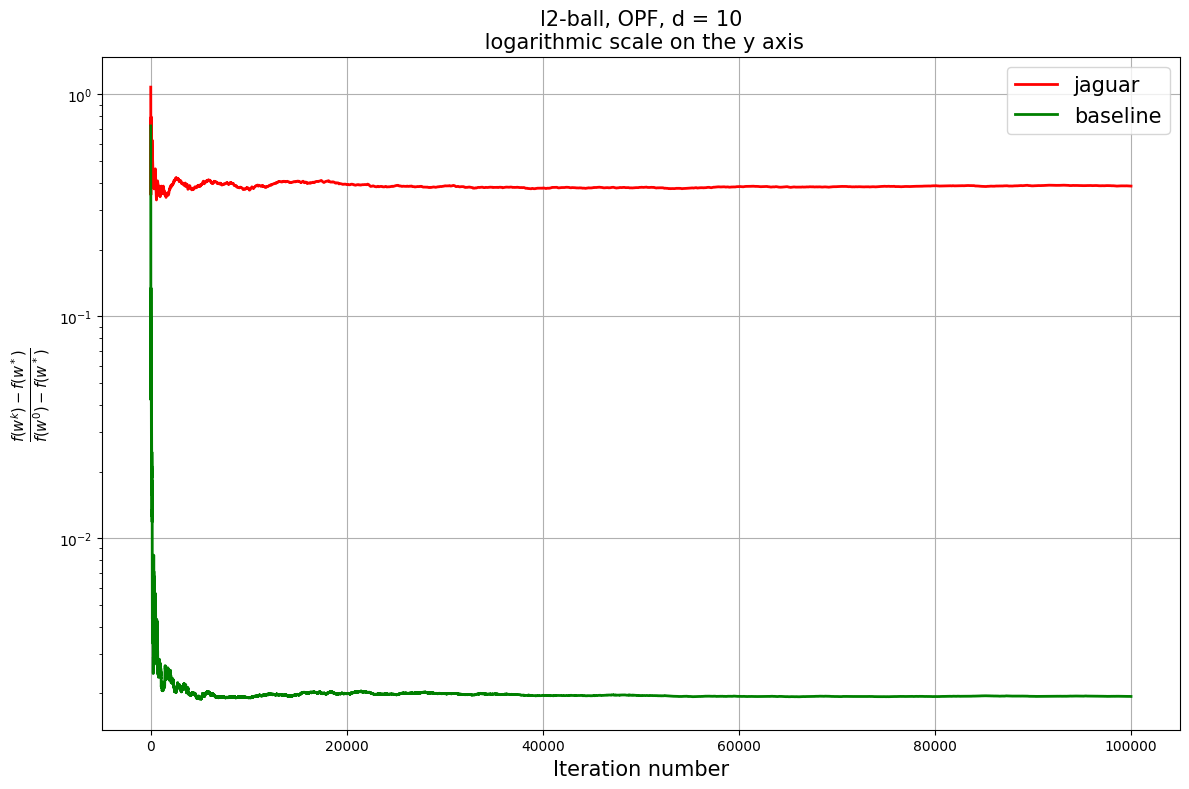

In [199]:
title = f"l2-ball, OPF, d = {d}"
y_label = r'$\frac{f(w^k) - f(w^*)}{f(w^0) - f(w^*)}$'
labels = [
    'jaguar',
    'baseline',
    'full'
]
iterations = range(1, len(errors) + 1)

optimizers.make_err_plot(oracle_calls, errors, y_label=y_label, labels=labels, title=title)

### simplex

In [201]:
reload(optimizers)

w_0 = np.random.random_sample(d)

### simplex ###
w_0_s = np.abs(w_0) / np.linalg.norm(w_0, ord=1)

_, _, w_sol_s = optimizers.GDOptimizer(
    w_0_s, 
    gradient_true, 
    const_step, 
    quadratic,
    eps = -1000,
    use_proj = True,
    set_name = 'simplex', 
    x_sol = w_0_s,
    max_oracle_calls = 1000000, 
    criterion = 'nabla(f)(x_k)'
).search()

R_0_s = quadratic(w_0_s) - quadratic(w_sol_s)

100%|██████████████████████████████| 1000000/1000000 [00:48<00:00, 20638.56it/s]


In [202]:
reload(optimizers)

get_grads = [
    optimizers.get_grad_opf_jaguar,
    optimizers.get_grad_opf
]
step_funcs = [
    fw_step,
    fw_step
]
use_jaguars = [
    True,
    False
]

errors = []
oracle_calls = []

for get_grad, step_func, use_jaguar in zip(get_grads, step_funcs, use_jaguars):
    errors_, oracle_calls_, _ = optimizers.FWOptimizer(
        w_0_s, 
        get_grad, 
        step_func, 
        quadratic,
        eps=-1000,
        set_name='simplex',
        use_jaguar = use_jaguar,
        x_sol = w_sol_s,
        max_oracle_calls = 100000
    ).search()
    errors.append(errors_ / R_0_s)
    oracle_calls.append(oracle_calls_)
    

100%|█████████████████████████████████| 100000/100000 [00:11<00:00, 8473.76it/s]


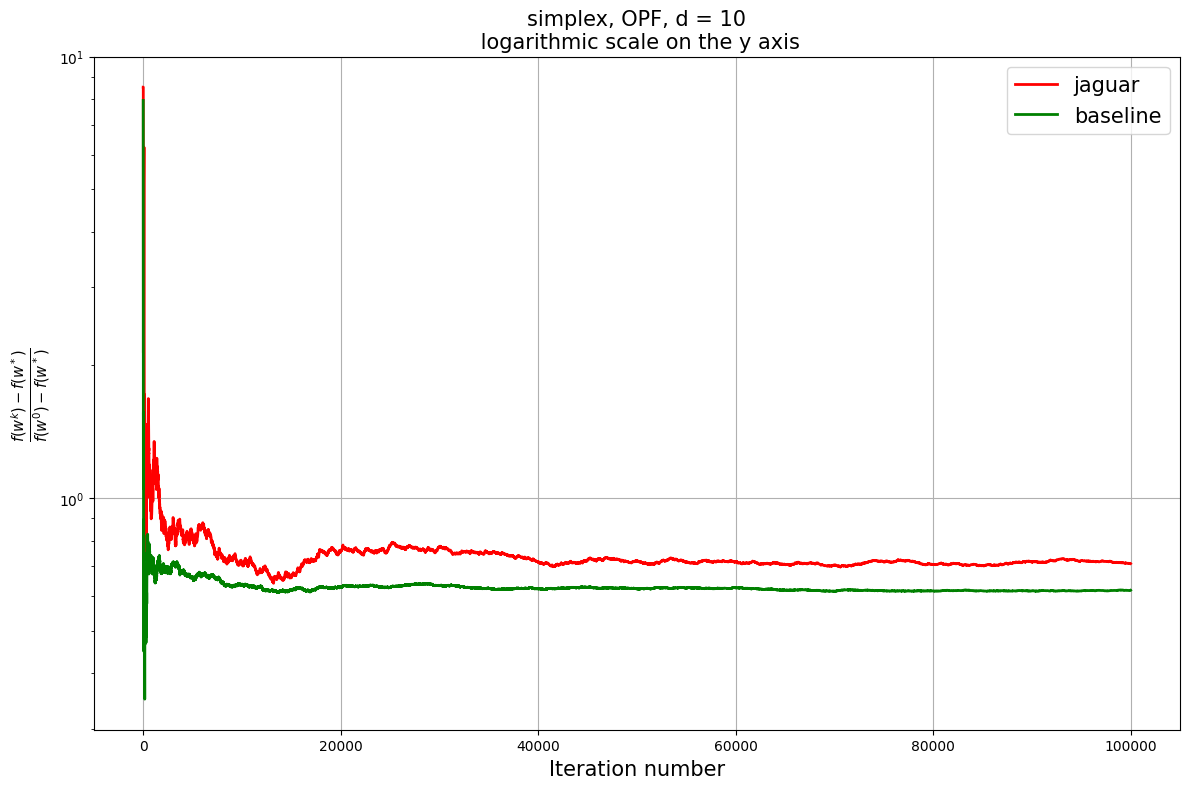

In [203]:
title = f"simplex, OPF, d = {d}"
y_label = r'$\frac{f(w^k) - f(w^*)}{f(w^0) - f(w^*)}$'
labels = [
    'jaguar',
    'baseline',
    'full'
]
iterations = range(1, len(errors) + 1)

optimizers.make_err_plot(oracle_calls, errors, y_label=y_label, labels=labels, title=title)

In [294]:
!say -v cellos Doo da doo da dum dee dee doodly doo dum dum dum doo da doo da doo da doo da doo dad doo da doo

# Квадратичная задача без ограничений

In [20]:
reload(optimizers)

w_0 = np.random.random_sample(d)
w_sol = np.linalg.inv(matrix) @ vector

R_0 = quadratic(w_0) - quadratic(w_sol)

In [48]:
def jaguar_step(k):
    if k > 10000:
        return 1 / (4 * d * L * (k // 10000))
    else:
        return 1 / (4 * d * L)
    
def coord_step(k):
    return 1 / (4 * d * L)
    
def sega_step(k):
    return 1 / (24 * d * L)

In [49]:
reload(optimizers)

step_funcs = [
    jaguar_step,
    coord_step,
    sega_step
]
use_jaguars = [
    True,
    False, 
    False
]
algorithms = [
    optimizers.GDOptimizer,
    optimizers.CDOptimizer,
    optimizers.SEGAOptimizer
]

errors = []
oracle_calls = []

for step_func, use_jaguar, algorithm in zip(step_funcs, use_jaguars, algorithms):
    errors_, oracle_calls_, _ = algorithm(
        w_0, 
        optimizers.get_grad_tpf_jaguar, 
        step_func, 
        quadratic,
        eps=-1000,
        use_jaguar = use_jaguar,
        x_sol = w_sol,
        max_oracle_calls = 1000000
    ).search()
    errors.append(errors_ / R_0)
    oracle_calls.append(oracle_calls_)

 50%|██████████████████████████▌                          | 500000/1000000 [01:21<01:21, 6152.26it/s]


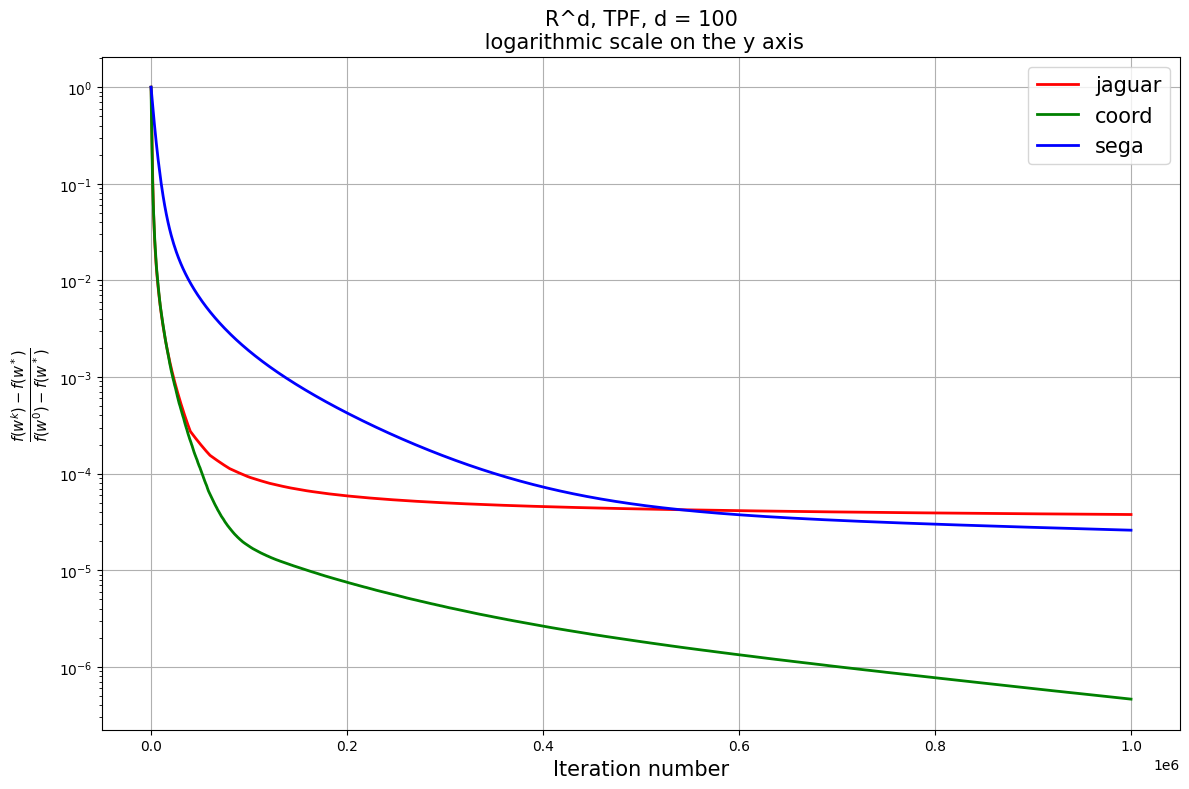

In [50]:
title = f"R^d, TPF, d = {d}"
y_label = r'$\frac{f(w^k) - f(w^*)}{f(w^0) - f(w^*)}$'
labels = [
    'jaguar',
    'coord',
    'sega'
]
iterations = range(1, len(errors) + 1)

optimizers.make_err_plot(oracle_calls, errors, y_label=y_label, labels=labels, title=title)

# Non-Linear Least Squares

In [ ]:
def nlls():